In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import norm

In [2]:
# df = pd.read_excel('data.xlsx', usecols='B') 

In [3]:
df = pd.read_excel('data.xlsx', sheet_name='Standardnormalverteilung') 
df

,Unnamed: 0,Standardnormalverteilung,Unnamed: 2
0,NaN,NaN,NaN
1,NaN,Hintergrund,Uns wird ein ungefähr normalverteilter Datensa...
2,NaN,Aufgabe 1,Mittel und Standardabweichung des Datensatzes ...
3,NaN,Aufgabe 2,Datensatz standardisieren
4,NaN,Aufgabe 3,Daten zur visuellen Darstellung der Änderung i...
...,...,...,...
84,NaN,842.866667,NaN
85,NaN,849.616667,NaN
86,NaN,874.7,NaN
87,NaN,878.783333,NaN


In [ ]:
df1 = df.loc[9:, 'Standardnormalverteilung'].reset_index()
df1 = df1.drop(columns='index')
df1 = df1.rename(columns={'Standardnormalverteilung':'SampleData'})
# df1 = df1.rename({'Standardnormalverteilung':'SampleData'}, axis=1)
df1

,SampleData
0,567.45
1,572.45
2,572.45
3,589.116667
4,613.866667
...,...
75,842.866667
76,849.616667
77,874.7
78,878.783333


In [7]:
df1=df1.astype(float)
df1.dtypes

SampleData    float64
dtype: object

<Axes: ylabel='Count'>

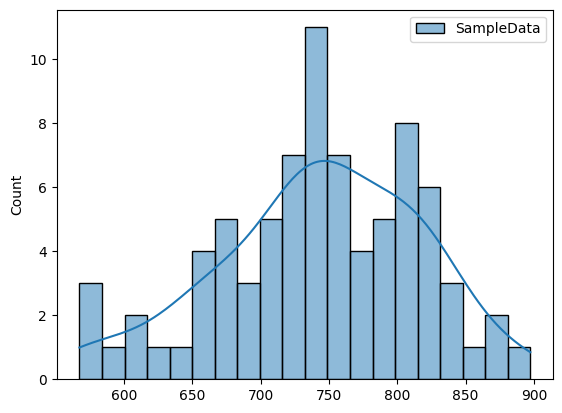

In [8]:
sns.histplot(data=df1, kde=True, bins=20)

In [ ]:
mittelwert = df1['SampleData'].mean() # Mittelwert
standardabweichung = df1['SampleData'].std() # Standardabweichung
mittelwert, standardabweichung
# df_norm = (df - df.mean()) / df.std()

(np.float64(743.0270833333334), np.float64(73.95306054776336))

In [11]:
df1['StandardData'] = (df1['SampleData'] - mittelwert ) / standardabweichung
df1

,SampleData,StandardData
0,567.450000,-2.374169
1,572.450000,-2.306559
2,572.450000,-2.306559
3,589.116667,-2.081191
4,613.866667,-1.746519
...,...,...
75,842.866667,1.350040
76,849.616667,1.441314
77,874.700000,1.780493
78,878.783333,1.835708


In [12]:
import matplotlib.pyplot as plt

<Axes: xlabel='StandardData', ylabel='Count'>

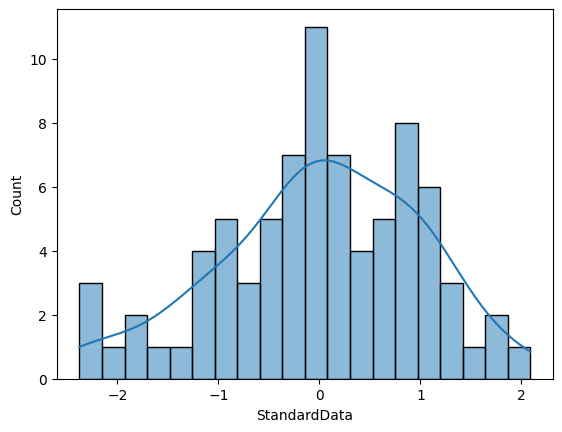

In [13]:
sns.histplot(data=df1['StandardData'], kde=True, bins=20)

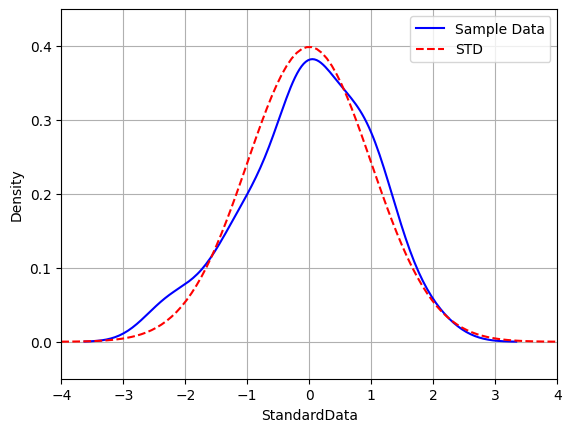

In [ ]:
sns.kdeplot(df1['StandardData'], color='blue', label='Sample Data')

mu = 0  # Mittelwert
sigma = 1  # Standardabweichung
x = np.linspace(-4, 4, 100)  # Werte für die x-Achse
# Dichtefunktion der Normalverteilung
y = norm.pdf(x, mu, sigma)
#y=norm.pdf(x,loc=0, scale=1)
plt.plot(x, y, color='red', linestyle='--', label='STD')

plt.xlim([-4,4])
plt.ylim([-0.05,0.45])
plt.legend()
plt.grid(True);